# ML On Weather Prediction
## 13/03/2024
## BSS/2021/94840
## M.Abdirisak.A

### We will be using three different ML Models
### 1) XGB Classifier
### 2) K-Nearest Neighbors Classifier
### 3) AdaBoost Classifier

In [1]:
# loading neccessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from neuralprophet import NeuralProphet
from sklearn.preprocessing import LabelEncoder

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
dataset=pd.read_csv("seattle-weather.csv")# loading the dataset
dataset

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
dataset.shape # shape of the dataset

(1461, 6)

In [4]:
dataset.columns # column names in the dataset

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [5]:
dataset.dtypes # data types in the dataset

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [6]:
dataset.describe() # describing dataset

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
dataset.describe(include='object')

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


In [8]:
for i in dataset.select_dtypes(include='object').columns:
    print('****************')
    print(dataset[i].value_counts())
    
# iterating each columns that contains object datat type 

****************
date
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: count, Length: 1461, dtype: int64
****************
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


In [9]:
dataset.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


## Pre-Processing the data

In [10]:
dataset.isnull().sum() # checking missing values

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [11]:
dataset.duplicated().sum() # checking duplicates in the dataset

0

In [12]:
dataset['date']=pd.to_datetime(dataset['date']) #converting object data type 'date' into datetime

In [13]:
dataset.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [14]:
dataset['weather']=LabelEncoder().fit_transform(dataset['weather']) # encoding weather varibale

## Data Visualization

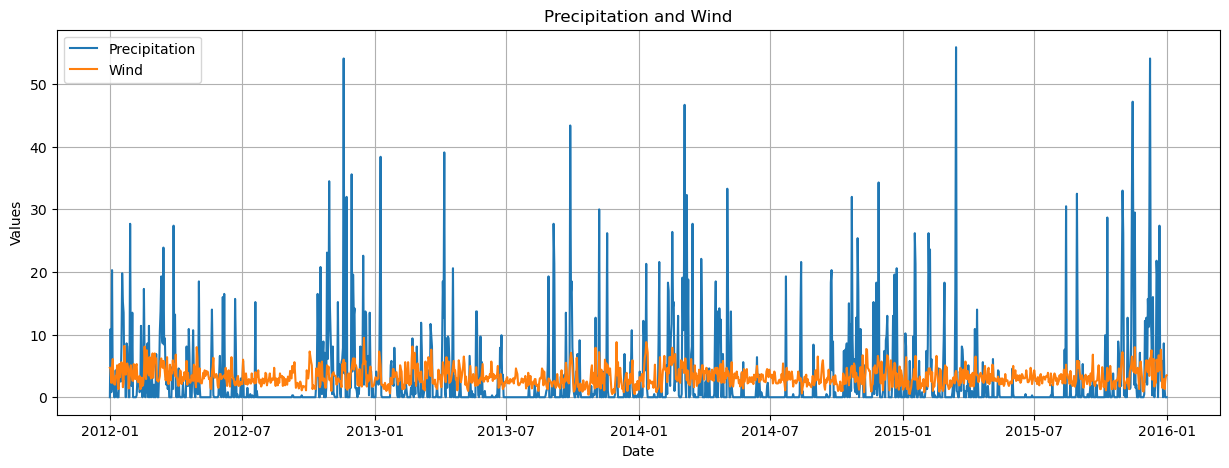

In [15]:
fig, ax = plt.subplots(figsize=(15, 5)) # Create a new figure with specified size

# Plot the data
ax.plot(dataset['date'], dataset['precipitation'], label='Precipitation')
ax.plot(dataset['date'], dataset['wind'], label='Wind')

ax.grid()# Add a grid to the plot

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Precipitation and Wind')

ax.legend()# Add a legend
plt.show()# Show the plot


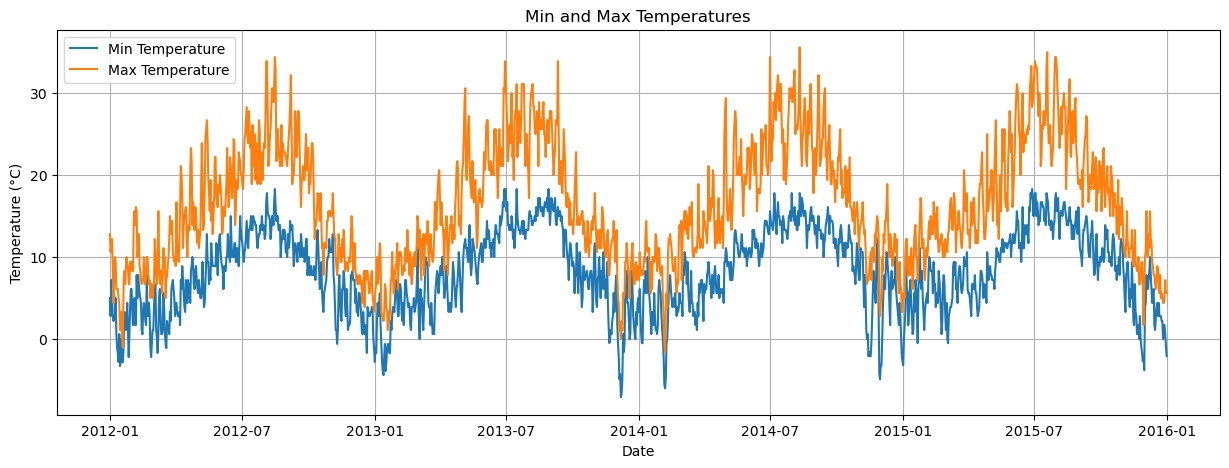

In [16]:
# Create a new figure with specified size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data
ax.plot(dataset['date'], dataset['temp_min'], label='Min Temperature')
ax.plot(dataset['date'], dataset['temp_max'], label='Max Temperature')

# Add a grid to the plot
ax.grid()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Min and Max Temperatures')

# Add a legend
ax.legend()

# Show the plot
plt.show()


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'precipitation'}>],
       [<Axes: title={'center': 'temp_max'}>,
        <Axes: title={'center': 'temp_min'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'weather'}>]], dtype=object)

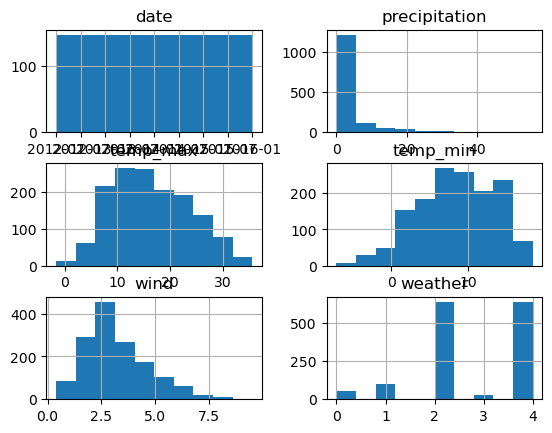

In [17]:
dataset.hist()

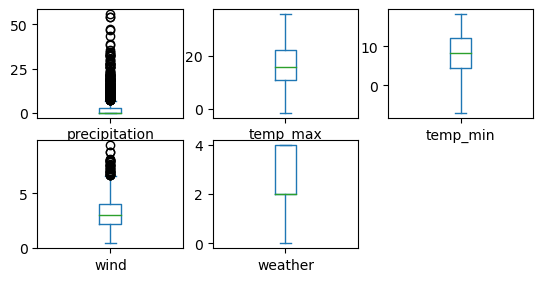

In [18]:
# box plot
dataset.plot(kind='box',subplots= True, sharex=False, sharey=False, layout=(3,3))
plt.show()

In [19]:
dataset.corr() #correlation of the dataset

,date,precipitation,temp_max,temp_min,wind,weather
date,1.000000,0.014292,0.145827,0.164249,-0.039163,0.067043
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,0.067043,-0.267388,0.322337,0.154981,-0.065858,1.000000


<Axes: >

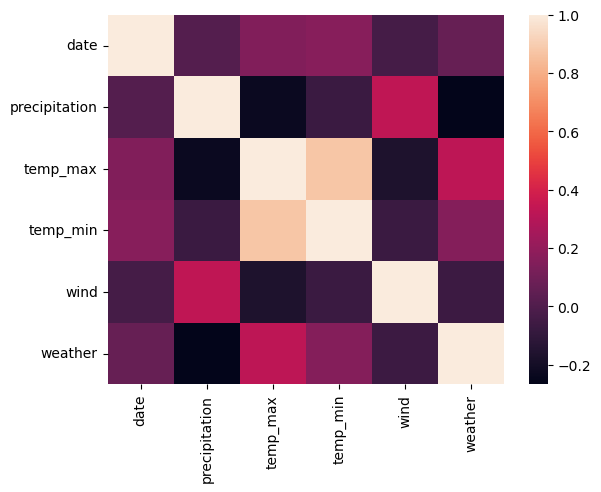

In [20]:
sns.heatmap(dataset.corr())

In [21]:
from pandas.plotting import scatter_matrix

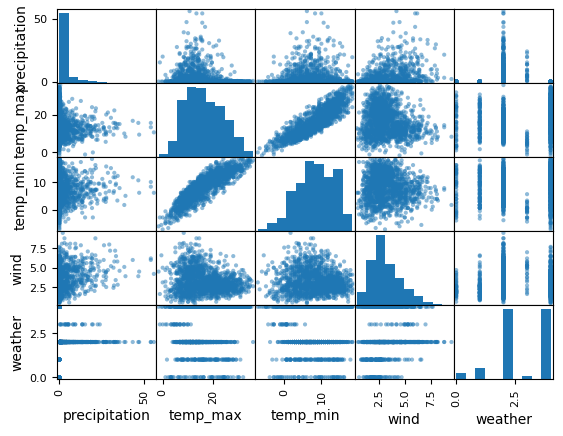

In [22]:
# scatter plot
scatter_matrix(dataset)
plt.show()

##  Training the models 

In [23]:
# spliting dataset into test and training varibales 
features=['precipitation','temp_max','temp_min','wind']
X=dataset[features]
y=dataset.weather
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)


## AdaBoost Classifier

In [24]:
ab=AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_accuracy = ab.score(X_test, y_test)
print(f"AB Accuracy: {ab_accuracy*100:.2f}%")


AB Accuracy: 84.70%


## XBG Classifier

In [25]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test, y_test)*100))

XGB Accuracy:78.42%


## K-Nearest Neighbors Classifier

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:72.68%


###### AdaBoostClassifier has the highest accuracy so we are going to use it 

## Improving the model using GridSearchSV

In [27]:
ab.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [28]:
parameters={
    'learning_rate':[1,2,3],
    'n_estimators':[100,500,100]  
}
cv=GridSearchCV(ab, param_grid=parameters, scoring='f1_micro',n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 100]},
             scoring='f1_micro', verbose=3)

In [29]:
#predicting values from GridSearchCV
y_pred= cv.predict(X_test)

In [30]:
# show classification report on test dataset
print(classification_report(y_test.values, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.17      0.23      0.19        31
           2       0.92      0.94      0.93       155
           3       1.00      0.17      0.29         6
           4       0.79      0.74      0.77       163

    accuracy                           0.76       366
   macro avg       0.63      0.47      0.49       366
weighted avg       0.78      0.76      0.76       366



## User input

In [37]:
# Get input from the user
precipitation = float(input("Enter the precipitation: "))  # Convert to float for consistency
temp_max = float(input("Enter the maximum temp: "))
temp_min = float(input("Enter the minimum temp: "))
wind = float(input('Enter the speed of wind: '))

# Create a dictionary with input values
input_data = {
    'precipitation': [precipitation],
    'temp_max': [temp_max],
    'temp_min': [temp_min],
    'wind': [wind]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
ot = ab.predict(input_df)

# Print the predicted weather
print("The weather is:")
if ot[0] == 0:
    print("Drizzle")
elif ot[0] == 1:
    print("Fog")
elif ot[0] == 2:
    print("Rain")
elif ot[0] == 3:
    print("Snow")
else:
    print("Sun")


Enter the precipitation: 23
Enter the maximum temp: 12
Enter the minimum temp: 34
Enter the speed of wind: 78
The weather is:
Rain
